# Checking which celebrities are known  

And using this information for analysis of other experiments

### import modules

In [1]:
import os
import fnmatch
import qgrid

import pandas as pd

### get logfiles

In [2]:
def getLogfile(whichfolder, whichexperiment):

    loglist = []
    for fileName in os.listdir(whichfolder):
        if fnmatch.fnmatch(fileName, whichexperiment):
            loglist.append(whichfolder+fileName)
    loglist.sort()
    return loglist

In [3]:
logList = getLogfile('../famousCheck/experiment/data/','*.csv')

In [4]:
logList[-5:]

['../famousCheck/experiment/data/6_textInputTest_2017_Jan_27_1111.csv',
 '../famousCheck/experiment/data/7_textInputTest_2017_Jan_30_1524.csv',
 '../famousCheck/experiment/data/8_textInputTest_2017_Feb_01_1735.csv',
 '../famousCheck/experiment/data/9_textInputTest_2017_Feb_02_1329.csv',
 '../famousCheck/experiment/data/jb_textInputTest_2016_Nov_23_1453.csv']

### load a logfile

In [5]:
logList[4]

'../famousCheck/experiment/data/14_textInputTest_2017_Feb_08_1348.csv'

In [6]:
df = pd.read_csv(logList[4],index_col=[0],header=0)

### extract relevant columns

In [7]:
def getCols(df):
    thisDf = pd.concat([df['name'], df['ratingBekannt.response'] ],axis=1)
    thisDf.index = df.index
    thisDf.columns = ['name','bekannt']
    thisDf = thisDf.dropna()
    return thisDf

In [8]:
thisDf = getCols(df)

In [9]:
thisDf

,name,bekannt
img,,
./img/BarackObama2.jpg,Barack Obama,ja
./img/JudithRakers7.jpg,Judith Rakers,nein
./img/OmarEpps(DrEricForeman)1.jpg,Omar Epps,ja
./img/JimParsons(SheldonCooper)1.jpg,Jim Parsons,ja
./img/BritneySpears5.jpg,Britney Spears,ja
./img/HughLaurie(DrHouse)9.jpg,Hugh Laurie,ja
./img/EmilyDeschanel3.jpg,Emily Deschanel,nein
./img/CarenMiosga4.jpg,Caren Miosga,nein
./img/JoachimLoew1.jpg,Joachim Löw,nein


## do this for all participants

In [10]:
d = {}
for logFile in logList:
    
    pNum = logFile.split('/')[-1].split('_')[0]
    
    df = pd.read_csv(logFile,index_col=[0],header=0)
    thisDf = getCols(df)
    thisDf.to_csv('../famousCheck/output/famousFamiliarity_%s.csv' % pNum)
    # count number of known people
    a = list(thisDf.bekannt)
    d[pNum] = float(a.count('ja'))/len(a)*100

In [11]:
df = pd.DataFrame(d,index=['known']).T

In [12]:
df.to_csv('../famousCheck/output/familiarFaces.csv')

In [13]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [14]:
snsDf = df.copy()
snsDf['hue'] = [['control','JB'][x=='jb'] for x in snsDf.index]
snsDf['x'] = [0 for x in snsDf.index]

In [15]:
snsDf.tail()

,known,hue,x
6,76.190476,control,0
7,76.190476,control,0
8,90.476190,control,0
9,85.714286,control,0
jb,88.095238,JB,0


In [16]:
swarmFig,ax = plt.subplots(1,1,figsize=(8,6))
sns.swarmplot(data=snsDf,x='x',y='known',hue='hue',
              size=16,orient='v',edgecolor='white',linewidth=1,alpha=0.8,ax=ax)

plt.title('Celebrity knowledge')
plt.ylim(0,100)
plt.close()

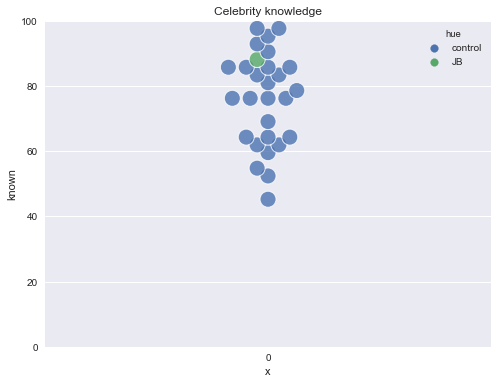

In [17]:
swarmFig

### who is best known overall?

In [18]:
famList = getLogfile('../famousCheck/output/','famousFamiliarity*.csv')

In [19]:
famFile = famList[-1]

In [20]:
bigDf = pd.DataFrame()
for famFile in famList:
    pName = famFile.split('/')[-1].split('_')[-1].split('.')[0]

    thisDf = pd.read_csv(famFile,index_col=[1])
    thisDf = thisDf.drop('img',axis=1).T
    thisDf.index = [pName]
    bigDf = pd.concat([bigDf,thisDf])

In [21]:
bigDf[bigDf=='ja'] = 1
bigDf[bigDf=='nein'] = 0

In [22]:
meanDf = pd.DataFrame( bigDf.mean() )
meanDf.columns = ['mean']
meanDf = meanDf.sort_values(by='mean',ascending=False)

In [23]:
import matplotlib
import numpy as np
matplotlib.rc('font', family='Arial')

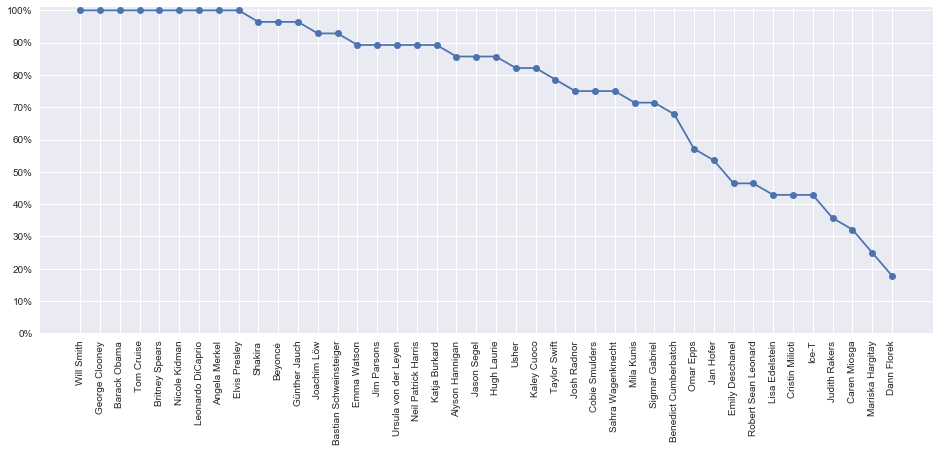

In [24]:
plt.figure(figsize=(16,6))
plt.plot(list(meanDf['mean']),'-o')
plt.xticks(range(meanDf.index.size),[x.decode("utf8") for x in meanDf.index],rotation=90);
plt.ylim(0,1.01)
plt.yticks(np.arange(0,1.01,0.1),['%s%%' % x for x in np.arange(0,101,10)] )
plt.show()